In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from PIL import Image
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df_encoded = df.copy()
le = LabelEncoder()
cat_cols = df_encoded.select_dtypes(include='object').columns
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [5]:
target = "price"
df_encoded["price"] = pd.qcut(df_encoded[target], q=3, labels=["1", "2", "3"])

In [6]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3,7420,4,2,3,1,0,0,0,1,2,1,0
1,3,8960,4,4,4,1,0,0,0,1,3,0,0
2,3,9960,3,2,2,1,0,1,0,0,2,1,1
3,3,7500,4,2,2,1,0,1,0,1,3,1,0
4,3,7420,4,1,2,1,1,1,0,1,2,0,0


In [7]:
x = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)
model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.57      0.60        35
           2       0.49      0.59      0.53        39
           3       0.87      0.74      0.80        35

    accuracy                           0.63       109
   macro avg       0.66      0.63      0.64       109
weighted avg       0.65      0.63      0.64       109



In [10]:
pca = PCA(n_components=0.9)
x_pca = pca.fit_transform(x_scaled)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)
model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.71      0.74        35
           2       0.60      0.64      0.62        39
           3       0.79      0.77      0.78        35

    accuracy                           0.71       109
   macro avg       0.72      0.71      0.71       109
weighted avg       0.71      0.71      0.71       109



In [13]:
tsne = TSNE(
    n_components=2,
    learning_rate='auto',
    init='pca',
    perplexity=30,
    random_state=0
)
x_tsne = tsne.fit_transform(x_scaled)

C:\Users\alex1\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\alex1\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\alex1\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\alex1\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [15]:
df_2d = df.copy()
df_2d['tsne_1'] = x_tsne[:, 0]
df_2d['tsne_2'] = x_tsne[:, 1]

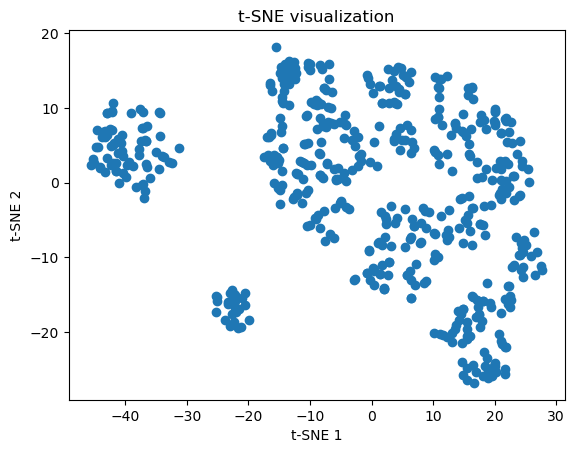

In [19]:
plt.scatter(df_2d['tsne_1'], df_2d['tsne_2'])
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE visualization")
plt.show()

In [21]:
img = Image.open("bird.jpg")
img_np = np.array(img)

In [27]:
def quantize_kmeans(image, k):
    h, w, c = image.shape
    data = image.reshape(-1, 3)

    kmeans = KMeans(n_clusters=k, n_init=5)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_.astype(np.uint8)

    quantized = centers[labels].reshape(h, w, 3)
    return quantized
    
levels = [64, 32, 16, 8]
quantized_results = {}
for k in levels:
    quantized_results[k] = quantize_kmeans(img_np, k)

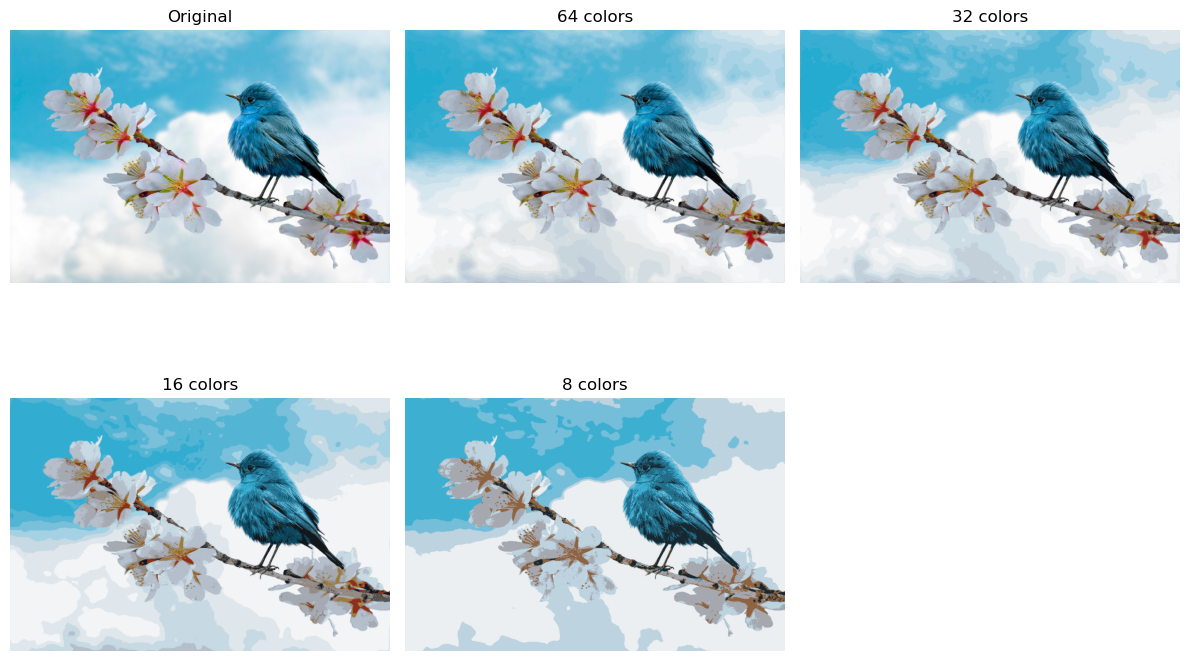

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_np)
plt.title("Original")
plt.axis("off")

i = 2
for k in levels:
    plt.subplot(2, 3, i)
    plt.imshow(quantized_results[k])
    plt.title(f"{k} colors")
    plt.axis("off")
    i += 1

plt.tight_layout()
plt.show()

In [31]:
df_text = pd.read_csv("email_spam.csv")

In [34]:
df_text.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [33]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alex1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alex1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alex1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)
df_text["clean_text"] = df_text["text"].apply(clean_text)

In [36]:
df_text.head()

,title,text,type,clean_text
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam,hi james claim complimentary gift yet ive comp...
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam,alttext congratulation earned completed follow...
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam,here github launch code mortyj octocat standin...
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam,hello thank contacting virtual reward center v...
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam,hey prachanda rawal today newsletter jampacked...


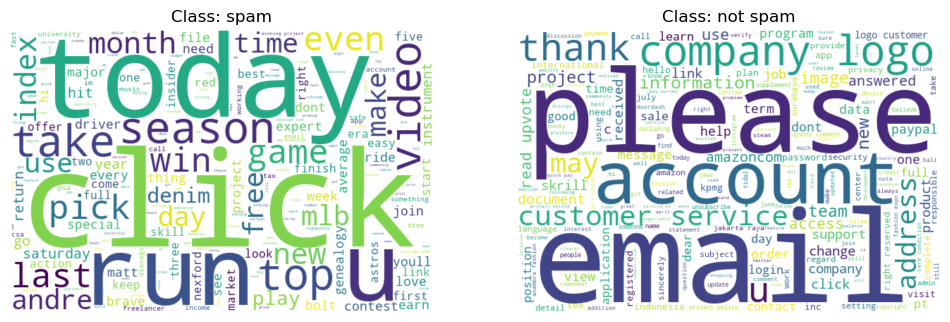

In [41]:
labels = df_text["type"].unique()
plt.figure(figsize=(12, 6))

for i, label in enumerate(labels):
    text_class = " ".join(df_text[df_text["type"] == label]["clean_text"])
    wc = WordCloud(width=600, height=400, background_color="white").generate(text_class)

    plt.subplot(1, len(labels), i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Class: {label}")
    plt.axis("off")

plt.show()

In [43]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df_text["text"])
y = df_text["type"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    not spam       0.86      0.92      0.89        13
        spam       0.67      0.50      0.57         4

    accuracy                           0.82        17
   macro avg       0.76      0.71      0.73        17
weighted avg       0.81      0.82      0.81        17

